In [ ]:
# Install the necessary libraries
!pip install pandas sqlalchemy ipython-sql

# Connect to a local SQLite database file
# This will create a file named 'food_wastage.db'
%load_ext sql
%sql sqlite:///food_wastage.db

print("Libraries installed and database connected. You can now upload your CSV files using the file icon on the left sidebar.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.7 MB/s eta 0:00:00
Libraries installed and database connected. You can now upload your CSV files using the file icon on the left sidebar.


## Load csvs into dataframes

### Subtask:
Load the four CSV files into pandas DataFrames.


In [ ]:
import pandas as pd

receivers_df = pd.read_csv('/content/receivers_data.csv')
providers_df = pd.read_csv('/content/providers_data.csv')
food_listings_df = pd.read_csv('/content/food_listings_data.csv')
claims_df = pd.read_csv('/content/claims_data.csv')

print("Head of receivers_df:")
display(receivers_df.head())

print("\nHead of providers_df:")
display(providers_df.head())

print("\nHead of food_listings_df:")
display(food_listings_df.head())

print("\nHead of claims_df:")
display(claims_df.head())

Head of receivers_df:


,Receiver_ID,Name,Type,City,Contact
0,1,Donald Gomez,Shelter,Port Carlburgh,(955)922-5295
1,2,Laurie Ramos,Individual,Lewisburgh,761.042.1570
2,3,Ashley Mckee,NGO,South Randalltown,691-023-0094x856
3,4,Erika Rose,NGO,South Shaneville,8296491111
4,5,John Romero,Individual,Bakerport,067.491.0154



Head of providers_df:


,Provider_ID,Name,Type,Address,City,Contact
0,1,Gonzales-Cochran,Supermarket,"74347 Christopher Extensions\nAndreamouth, OK ...",New Jessica,+1-600-220-0480
1,2,"Nielsen, Johnson and Fuller",Grocery Store,"91228 Hanson Stream\nWelchtown, OR 27136",East Sheena,+1-925-283-8901x6297
2,3,Miller-Black,Supermarket,"561 Martinez Point Suite 507\nGuzmanchester, W...",Lake Jesusview,001-517-295-2206
3,4,"Clark, Prince and Williams",Grocery Store,"467 Bell Trail Suite 409\nPort Jesus, IA 61188",Mendezmouth,556.944.8935x401
4,5,Coleman-Farley,Grocery Store,"078 Matthew Creek Apt. 319\nSaraborough, MA 53978",Valentineside,193.714.6577



Head of food_listings_df:


,Food_ID,Food_Name,Quantity,Expiry_Date,Provider_ID,Provider_Type,Location,Food_Type,Meal_Type
0,1,Bread,43,3/17/2025,110,Grocery Store,South Kellyville,Non-Vegetarian,Breakfast
1,2,Soup,22,3/24/2025,791,Grocery Store,West James,Non-Vegetarian,Dinner
2,3,Fruits,46,3/28/2025,478,Catering Service,Lake Regina,Vegan,Breakfast
3,4,Fruits,15,3/16/2025,930,Restaurant,Kellytown,Vegan,Lunch
4,5,Soup,14,3/19/2025,279,Restaurant,Garciaport,Vegan,Dinner



Head of claims_df:


,Claim_ID,Food_ID,Receiver_ID,Status,Timestamp
0,1,164,908,Pending,3/5/2025 5:26
1,2,353,391,Cancelled,3/11/2025 10:24
2,3,626,492,Completed,3/21/2025 0:59
3,4,61,933,Cancelled,3/4/2025 9:08
4,5,345,229,Pending,3/14/2025 15:17


In [ ]:
dataframes = [receivers_df, providers_df, food_listings_df, claims_df]
dataframe_names = ['receivers_df', 'providers_df', 'food_listings_df', 'claims_df']

for df, name in zip(dataframes, dataframe_names):
  df.columns = df.columns.str.replace(' ', '_')
  print(f"Columns of {name} after cleaning:")
  print(df.columns)
  print("-" * 30)

# Convert 'Expiry_Date' column in food_listings_df to datetime objects
food_listings_df['Expiry_Date'] = pd.to_datetime(food_listings_df['Expiry_Date'])

print("Data cleaning complete.")

Columns of receivers_df after cleaning:
Index(['Receiver_ID', 'Name', 'Type', 'City', 'Contact'], dtype='object')
------------------------------
Columns of providers_df after cleaning:
Index(['Provider_ID', 'Name', 'Type', 'Address', 'City', 'Contact'], dtype='object')
------------------------------
Columns of food_listings_df after cleaning:
Index(['Food_ID', 'Food_Name', 'Quantity', 'Expiry_Date', 'Provider_ID',
       'Provider_Type', 'Location', 'Food_Type', 'Meal_Type'],
      dtype='object')
------------------------------
Columns of claims_df after cleaning:
Index(['Claim_ID', 'Food_ID', 'Receiver_ID', 'Status', 'Timestamp'], dtype='object')
------------------------------
Data cleaning complete.


In [ ]:
from sqlalchemy import create_engine

engine = create_engine('sqlite:///food_wastage.db')

receivers_df.to_sql('receivers', con=engine, if_exists='replace', index=False)
providers_df.to_sql('providers', con=engine, if_exists='replace', index=False)
food_listings_df.to_sql('food_listings', con=engine, if_exists='replace', index=False)
claims_df.to_sql('claims', con=engine, if_exists='replace', index=False)

print("DataFrames successfully loaded into the SQLite database as tables.")

DataFrames successfully loaded into the SQLite database as tables.


## Load data into tables

### Subtask:
Load the data from each DataFrame into their respective tables in the SQLite database.


**Reasoning**:
Load the data from each DataFrame into their respective tables in the SQLite database using the 'append' mode.



In [ ]:
engine = create_engine('sqlite:///food_wastage.db')

receivers_df.to_sql('receivers', con=engine, if_exists='append', index=False)
providers_df.to_sql('providers', con=engine, if_exists='append', index=False)
food_listings_df.to_sql('food_listings', con=engine, if_exists='append', index=False)
claims_df.to_sql('claims', con=engine, if_exists='append', index=False)

print("Data from DataFrames successfully appended to the SQLite database tables.")

Data from DataFrames successfully appended to the SQLite database tables.


## Verify data loading

### Subtask:
Query the database to verify that the data has been loaded correctly into the tables.


In [ ]:
from sqlalchemy import create_engine
import pandas as pd

engine = create_engine('sqlite:///food_wastage.db')

query_receivers = "SELECT * FROM receivers LIMIT 5;"
query_providers = "SELECT * FROM providers LIMIT 5;"
query_food_listings = "SELECT * FROM food_listings LIMIT 5;"
query_claims = "SELECT * FROM claims LIMIT 5;"

df_receivers_query = pd.read_sql(query_receivers, engine)
df_providers_query = pd.read_sql(query_providers, engine)
df_food_listings_query = pd.read_sql(query_food_listings, engine)
df_claims_query = pd.read_sql(query_claims, engine)

print("First 5 rows of receivers table:")
display(df_receivers_query)

print("\nFirst 5 rows of providers table:")
display(df_providers_query)

print("\nFirst 5 rows of food_listings table:")
display(df_food_listings_query)

print("\nFirst 5 rows of claims table:")
display(df_claims_query)

First 5 rows of receivers table:


,Receiver_ID,Name,Type,City,Contact
0,1,Donald Gomez,Shelter,Port Carlburgh,(955)922-5295
1,2,Laurie Ramos,Individual,Lewisburgh,761.042.1570
2,3,Ashley Mckee,NGO,South Randalltown,691-023-0094x856
3,4,Erika Rose,NGO,South Shaneville,8296491111
4,5,John Romero,Individual,Bakerport,067.491.0154



First 5 rows of providers table:


,Provider_ID,Name,Type,Address,City,Contact
0,1,Gonzales-Cochran,Supermarket,"74347 Christopher Extensions\nAndreamouth, OK ...",New Jessica,+1-600-220-0480
1,2,"Nielsen, Johnson and Fuller",Grocery Store,"91228 Hanson Stream\nWelchtown, OR 27136",East Sheena,+1-925-283-8901x6297
2,3,Miller-Black,Supermarket,"561 Martinez Point Suite 507\nGuzmanchester, W...",Lake Jesusview,001-517-295-2206
3,4,"Clark, Prince and Williams",Grocery Store,"467 Bell Trail Suite 409\nPort Jesus, IA 61188",Mendezmouth,556.944.8935x401
4,5,Coleman-Farley,Grocery Store,"078 Matthew Creek Apt. 319\nSaraborough, MA 53978",Valentineside,193.714.6577



First 5 rows of food_listings table:


,Food_ID,Food_Name,Quantity,Expiry_Date,Provider_ID,Provider_Type,Location,Food_Type,Meal_Type
0,1,Bread,43,2025-03-17 00:00:00.000000,110,Grocery Store,South Kellyville,Non-Vegetarian,Breakfast
1,2,Soup,22,2025-03-24 00:00:00.000000,791,Grocery Store,West James,Non-Vegetarian,Dinner
2,3,Fruits,46,2025-03-28 00:00:00.000000,478,Catering Service,Lake Regina,Vegan,Breakfast
3,4,Fruits,15,2025-03-16 00:00:00.000000,930,Restaurant,Kellytown,Vegan,Lunch
4,5,Soup,14,2025-03-19 00:00:00.000000,279,Restaurant,Garciaport,Vegan,Dinner



First 5 rows of claims table:


,Claim_ID,Food_ID,Receiver_ID,Status,Timestamp
0,1,164,908,Pending,3/5/2025 5:26
1,2,353,391,Cancelled,3/11/2025 10:24
2,3,626,492,Completed,3/21/2025 0:59
3,4,61,933,Cancelled,3/4/2025 9:08
4,5,345,229,Pending,3/14/2025 15:17


In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 56.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 79.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.1 MB/s eta 0:00:00


In [ ]:
import sqlite3

conn = sqlite3.connect("food_wastage.db")
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())


[]


In [ ]:
import sqlite3

# Connect to your database
conn = sqlite3.connect("food_wastage.db")
cursor = conn.cursor()

# List all tables
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print("Tables in DB:", tables)


Tables in DB: []


In [ ]:
%%sql
SELECT Status,
       (COUNT(*) * 100.0 / (SELECT COUNT(*) FROM claims)) AS Percentage
FROM claims
GROUP BY Status;

UsageError: Cell magic `%%sql` not found.


In [ ]:
!pip install pandas matplotlib sqlalchemy

In [ ]:
import sqlite3
import pandas as pd

# Connect or create the database
conn = sqlite3.connect("food_wastage.db")

# Load CSVs into DataFrames
providers = pd.read_csv("providers_data.csv")
receivers = pd.read_csv("receivers_data.csv")
food_listings = pd.read_csv("food_listings_data.csv")
claims = pd.read_csv("claims_data.csv")

# Write DataFrames to SQL tables
providers.to_sql("providers", conn, if_exists="replace", index=False)
receivers.to_sql("receivers", conn, if_exists="replace", index=False)
food_listings.to_sql("food_listings", conn, if_exists="replace", index=False)
claims.to_sql("claims", conn, if_exists="replace", index=False)

conn.commit()
conn.close()


In [ ]:
conn = sqlite3.connect("food_wastage.db")
print(pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn))
conn.close()


            name
0      providers
1      receivers
2  food_listings
3         claims


In [ ]:
query = """
SELECT Status,
       COUNT(*) * 100.0 / (SELECT COUNT(*) FROM claims) AS Percentage
FROM claims
GROUP BY Status;
"""
conn = sqlite3.connect("food_wastage.db")
df = pd.read_sql_query(query, conn)
print(df)
conn.close()


      Status  Percentage
0  Cancelled        33.6
1  Completed        33.9
2    Pending        32.5


In [ ]:
query = """
SELECT Status,
       COUNT(*) * 100.0 / (SELECT COUNT(*) FROM claims) AS Percentage
FROM claims
GROUP BY Status;
"""
import pandas as pd
import sqlite3

conn = sqlite3.connect("food_wastage.db")
df = pd.read_sql_query(query, conn)
conn.close()

df


,Status,Percentage
0,Cancelled,33.6
1,Completed,33.9
2,Pending,32.5


In [ ]:
df.to_csv("query1_output.csv", index=False)


In [ ]:
# Example: Add a new food listing
conn = sqlite3.connect("food_wastage.db")
conn.execute("""
INSERT INTO food_listings (Food_ID, Food_Name, Quantity, Expiry_Date, Provider_ID, Provider_Type, Location, Food_Type, Meal_Type)
VALUES (101, 'Bread', 50, '2025-08-20', 1, 'Restaurant', 'Mumbai', 'Vegetarian', 'Breakfast')
""")
conn.commit()
conn.close()


In [ ]:
import sqlite3
import pandas as pd

# Connect to the database
conn = sqlite3.connect("food_wastage.db")

query1 = """
SELECT city, COUNT(*) AS provider_count
FROM providers
GROUP BY city;
"""
df1 = pd.read_sql_query(query1, conn)

# Close the connection after use
conn.close()

df1

,City,provider_count
0,Adambury,1
1,Adamsview,1
2,Adamsville,1
3,Aguirreville,1
4,Alexanderchester,1
...,...,...
958,Wrightville,1
959,Yatesside,1
960,Youngchester,1
961,Zimmermanton,1


In [ ]:
import sqlite3
import pandas as pd

# Connect to the database
conn = sqlite3.connect("food_wastage.db")

query2 = """
SELECT type, COUNT(*) AS food_count
FROM providers
GROUP BY type;
"""
df2 = pd.read_sql_query(query2, conn)

# Close the connection after use
conn.close()

df2

,Type,food_count
0,Catering Service,236
1,Grocery Store,256
2,Restaurant,246
3,Supermarket,262


In [ ]:
import sqlite3
import pandas as pd

# Connect to SQLite DB
conn = sqlite3.connect("food_wastage.db")

# Dictionary of queries
queries = {
    "query3_contact_providers_city": """
        SELECT Name, Contact
        FROM providers
        WHERE City = 'Mumbai';
    """,
    "query4_receivers_most_claims": """
        SELECT r.Name, COUNT(c.Claim_ID) AS claims_count
        FROM receivers r
        JOIN claims c ON r.Receiver_ID = c.Receiver_ID
        GROUP BY r.Name
        ORDER BY claims_count DESC;
    """,
    "query5_total_food_quantity": """
        SELECT SUM(Quantity) AS total_quantity
        FROM food_listings;
    """,
    "query6_city_most_listings": """
        SELECT Location, COUNT(*) AS listing_count
        FROM food_listings
        GROUP BY Location
        ORDER BY listing_count DESC
        LIMIT 1;
    """,
    "query7_common_food_types": """
        SELECT Food_Type, COUNT(*) AS type_count
        FROM food_listings
        GROUP BY Food_Type
        ORDER BY type_count DESC;
    """,
    "query8_claims_per_food_item": """
        SELECT f.Food_Name, COUNT(c.Claim_ID) AS claims_count
        FROM food_listings f
        JOIN claims c ON f.Food_ID = c.Food_ID
        GROUP BY f.Food_Name
        ORDER BY claims_count DESC;
    """,
    "query9_provider_most_successful_claims": """
        SELECT p.Name, COUNT(c.Claim_ID) AS completed_claims
        FROM providers p
        JOIN food_listings f ON p.Provider_ID = f.Provider_ID
        JOIN claims c ON f.Food_ID = c.Food_ID
        WHERE c.Status = 'Completed'
        GROUP BY p.Name
        ORDER BY completed_claims DESC
        LIMIT 1;
    """,
    "query10_percentage_claims_status": """
        SELECT Status,
               COUNT(*) * 100.0 / (SELECT COUNT(*) FROM claims) AS percentage
        FROM claims
        GROUP BY Status;
    """,
    "query11_avg_quantity_per_receiver": """
        SELECT r.Name, AVG(f.Quantity) AS avg_quantity
        FROM receivers r
        JOIN claims c ON r.Receiver_ID = c.Receiver_ID
        JOIN food_listings f ON c.Food_ID = f.Food_ID
        GROUP BY r.Name
        ORDER BY avg_quantity DESC;
    """,
    "query12_most_claimed_meal_type": """
        SELECT Meal_Type, COUNT(*) AS claims_count
        FROM food_listings f
        JOIN claims c ON f.Food_ID = c.Food_ID
        GROUP BY Meal_Type
        ORDER BY claims_count DESC
        LIMIT 1;
    """,
    "query13_total_quantity_per_provider": """
        SELECT p.Name, SUM(f.Quantity) AS total_donated
        FROM providers p
        JOIN food_listings f ON p.Provider_ID = f.Provider_ID
        GROUP BY p.Name
        ORDER BY total_donated DESC;
    """,
    "query14_top5_locations_completed_claims": """
        SELECT f.Location, COUNT(c.Claim_ID) AS completed_claims
        FROM food_listings f
        JOIN claims c ON f.Food_ID = c.Food_ID
        WHERE c.Status = 'Completed'
        GROUP BY f.Location
        ORDER BY completed_claims DESC
        LIMIT 5;
    """,
    "query15_providers_expiring_soon": """
        SELECT p.Name, f.Food_Name, f.Expiry_Date
        FROM providers p
        JOIN food_listings f ON p.Provider_ID = f.Provider_ID
        WHERE DATE(f.Expiry_Date) <= DATE('now', '+7 day')
        ORDER BY f.Expiry_Date ASC;
    """
}

# Loop through queries, run them, and save results
for name, sql in queries.items():
    df = pd.read_sql_query(sql, conn)
    df.to_csv(f"{name}.csv", index=False)
    print(f"{name} - {len(df)} rows saved to {name}.csv")

# Close the connection
conn.close()


query3_contact_providers_city - 0 rows saved to query3_contact_providers_city.csv
query4_receivers_most_claims - 620 rows saved to query4_receivers_most_claims.csv
query5_total_food_quantity - 1 rows saved to query5_total_food_quantity.csv
query6_city_most_listings - 1 rows saved to query6_city_most_listings.csv
query7_common_food_types - 3 rows saved to query7_common_food_types.csv
query8_claims_per_food_item - 10 rows saved to query8_claims_per_food_item.csv
query9_provider_most_successful_claims - 1 rows saved to query9_provider_most_successful_claims.csv
query10_percentage_claims_status - 3 rows saved to query10_percentage_claims_status.csv
query11_avg_quantity_per_receiver - 620 rows saved to query11_avg_quantity_per_receiver.csv
query12_most_claimed_meal_type - 1 rows saved to query12_most_claimed_meal_type.csv
query13_total_quantity_per_provider - 628 rows saved to query13_total_quantity_per_provider.csv
query14_top5_locations_completed_claims - 5 rows saved to query14_top5_loca

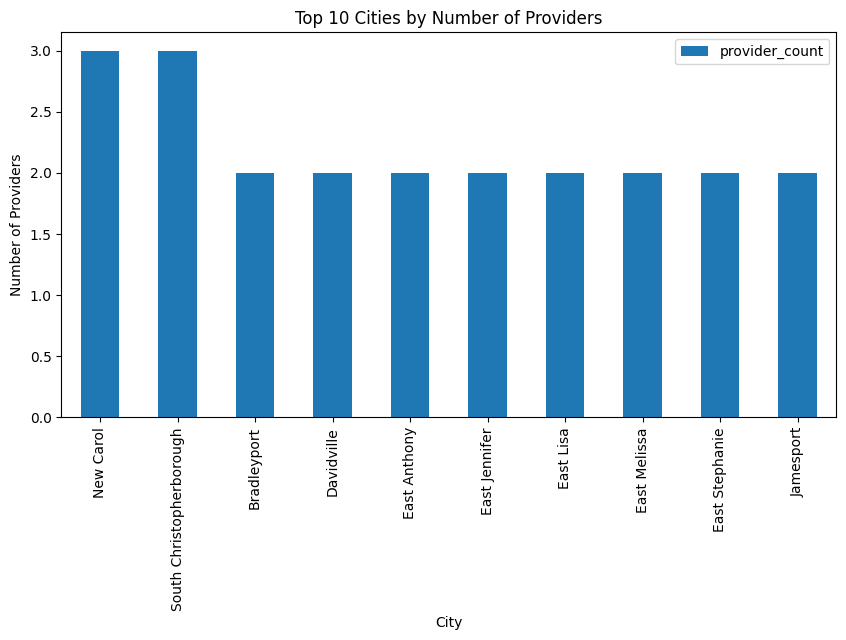

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the database
conn = sqlite3.connect("food_wastage.db")

# Query to get provider counts by city
query1 = """
SELECT city, COUNT(*) AS provider_count
FROM providers
GROUP BY city;
"""
df1 = pd.read_sql_query(query1, conn)

# Close the connection
conn.close()

# Plot top 10 cities by provider count
df1.nlargest(10, "provider_count").plot(
    x="City",
    y="provider_count",
    kind="bar",
    title="Top 10 Cities by Number of Providers",
    figsize=(10,5)
)
plt.xlabel("City")
plt.ylabel("Number of Providers")
plt.show()

--- Top 10 Cities by Number of Providers ---
               City  provider_count
0          Adambury               1
1         Adamsview               1
2        Adamsville               1
3      Aguirreville               1
4  Alexanderchester               1
5     Alexanderstad               1
6      Allenborough               1
7          Allenton               1
8     Amandaborough               1
9       Amandashire               1


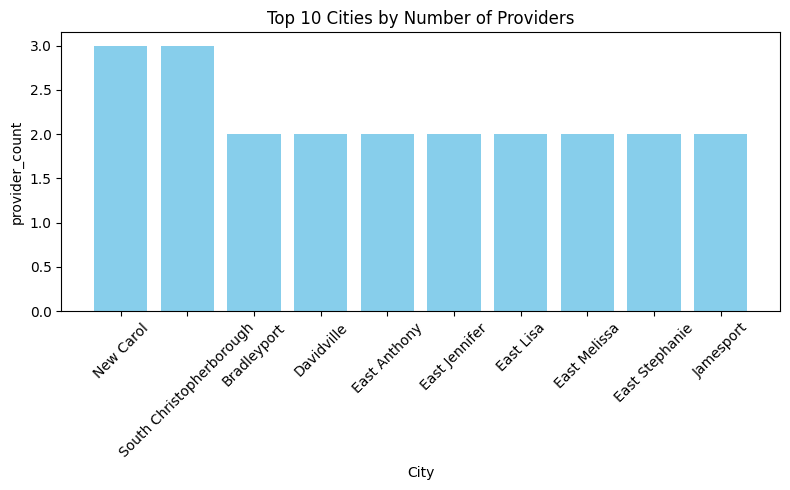

--- Food Provider Type Contributions ---
               Type  food_count
0       Supermarket         262
1     Grocery Store         256
2        Restaurant         246
3  Catering Service         236


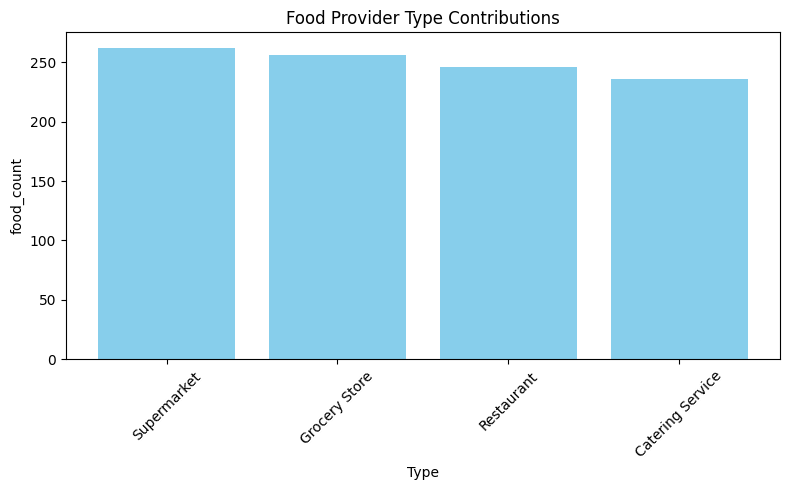

--- Most Common Food Types ---
        Food_Type  type_count
0      Vegetarian         337
1           Vegan         334
2  Non-Vegetarian         330


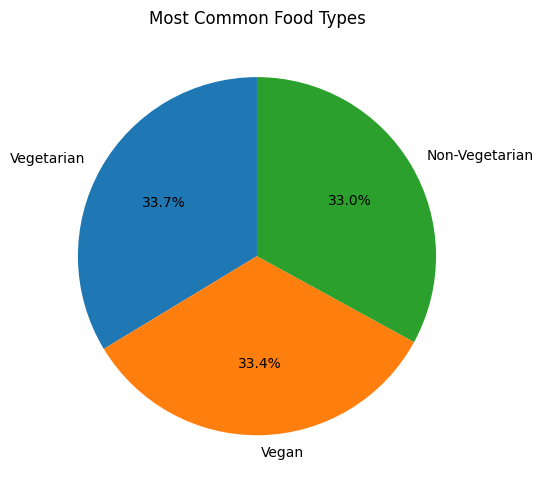

--- Percentage of Claims by Status ---
      Status  percentage
0  Cancelled        33.6
1  Completed        33.9
2    Pending        32.5


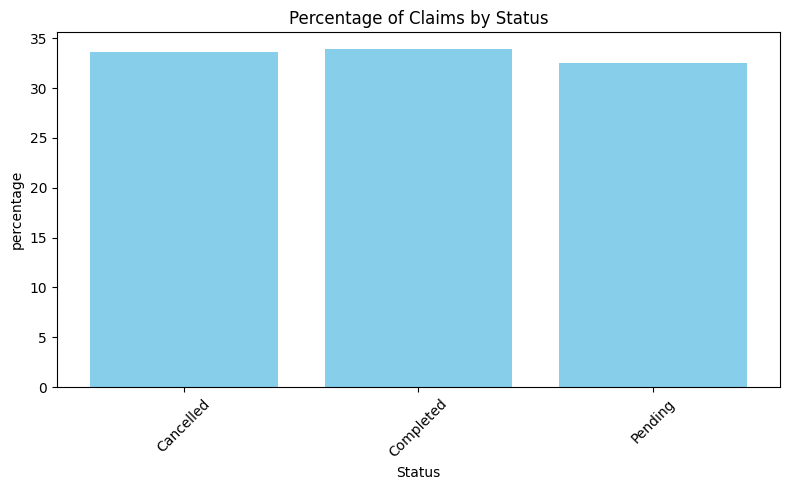

--- Most Claimed Meal Type ---
   Meal_Type  claims_count
0  Breakfast           281
1      Lunch           250
2     Snacks           240
3     Dinner           232


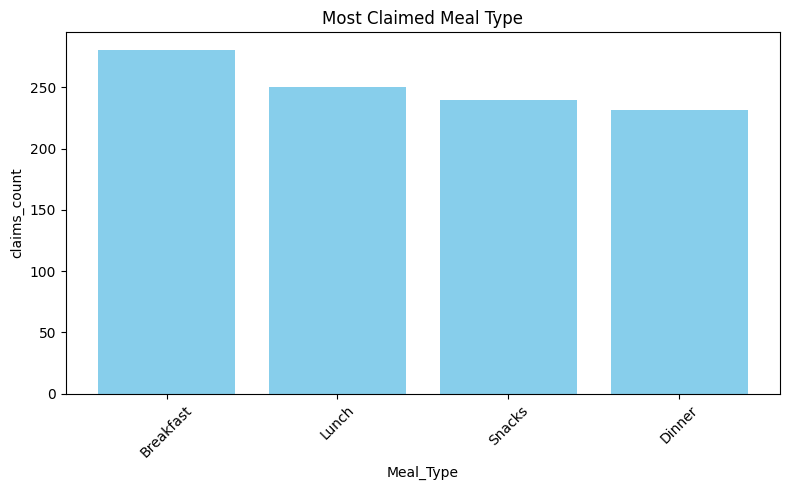

--- Top 5 Locations by Completed Claims ---
           Location  completed_claims
0     South Kathryn                 5
1    Zimmermanville                 4
2         New Carol                 4
3  East Heatherport                 4
4        Devinmouth                 4


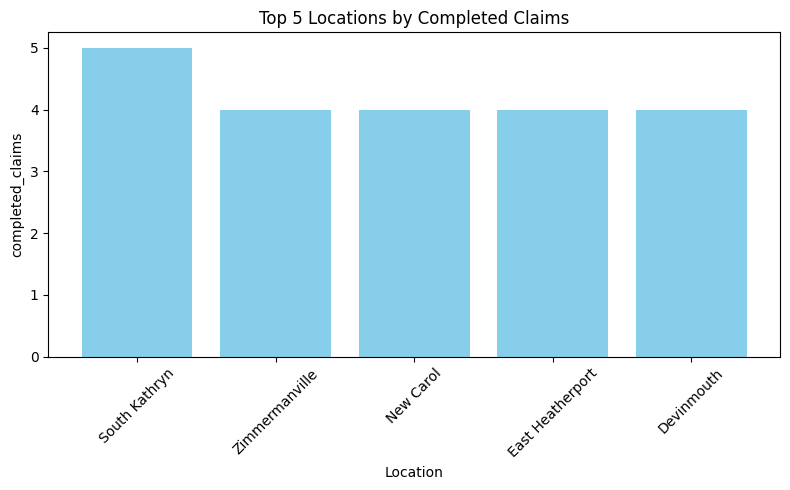

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to DB
conn = sqlite3.connect("food_wastage.db")

# Dictionary of queries with a title & chart type
queries = {
    "query1": {
        "sql": """
            SELECT City, COUNT(*) AS provider_count
            FROM providers
            GROUP BY City;
        """,
        "title": "Top 10 Cities by Number of Providers",
        "chart": "bar",
        "x": "City",
        "y": "provider_count",
        "top": 10
    },
    "query2": {
        "sql": """
            SELECT Type, COUNT(*) AS food_count
            FROM providers
            GROUP BY Type
            ORDER BY food_count DESC;
        """,
        "title": "Food Provider Type Contributions",
        "chart": "bar",
        "x": "Type",
        "y": "food_count"
    },
    "query7": {
        "sql": """
            SELECT Food_Type, COUNT(*) AS type_count
            FROM food_listings
            GROUP BY Food_Type
            ORDER BY type_count DESC;
        """,
        "title": "Most Common Food Types",
        "chart": "pie",
        "x": "Food_Type",
        "y": "type_count"
    },
    "query10": {
        "sql": """
            SELECT Status,
                   COUNT(*) * 100.0 / (SELECT COUNT(*) FROM claims) AS percentage
            FROM claims
            GROUP BY Status;
        """,
        "title": "Percentage of Claims by Status",
        "chart": "bar",
        "x": "Status",
        "y": "percentage"
    },
    "query12": {
        "sql": """
            SELECT Meal_Type, COUNT(*) AS claims_count
            FROM food_listings f
            JOIN claims c ON f.Food_ID = c.Food_ID
            GROUP BY Meal_Type
            ORDER BY claims_count DESC;
        """,
        "title": "Most Claimed Meal Type",
        "chart": "bar",
        "x": "Meal_Type",
        "y": "claims_count"
    },
    "query14": {
        "sql": """
            SELECT f.Location, COUNT(c.Claim_ID) AS completed_claims
            FROM food_listings f
            JOIN claims c ON f.Food_ID = c.Food_ID
            WHERE c.Status = 'Completed'
            GROUP BY f.Location
            ORDER BY completed_claims DESC
            LIMIT 5;
        """,
        "title": "Top 5 Locations by Completed Claims",
        "chart": "bar",
        "x": "Location",
        "y": "completed_claims"
    }
}

# Function to plot based on type
def plot_chart(df, title, chart, x, y, top=None):
    plt.figure(figsize=(8,5))
    if top:
        df = df.nlargest(top, y)
    if chart == "bar":
        plt.bar(df[x], df[y], color='skyblue')
        plt.xticks(rotation=45)
        plt.xlabel(x)
        plt.ylabel(y)
    elif chart == "pie":
        plt.pie(df[y], labels=df[x], autopct='%1.1f%%', startangle=90)
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Loop through queries and plot
for qname, qdata in queries.items():
    df = pd.read_sql_query(qdata["sql"], conn)
    print(f"--- {qdata['title']} ---")
    print(df.head(10))
    plot_chart(df, qdata["title"], qdata["chart"], qdata["x"], qdata["y"], qdata.get("top"))

conn.close()


2025-08-15 19:25:34.804 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-15 19:25:34.885 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-08-15 19:25:34.886 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-15 19:25:34.888 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-15 19:25:34.890 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-15 19:25:34.891 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-15 19:25:34.892 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-15 19:25:34.941 Thread 'MainThread': mi

DeltaGenerator()

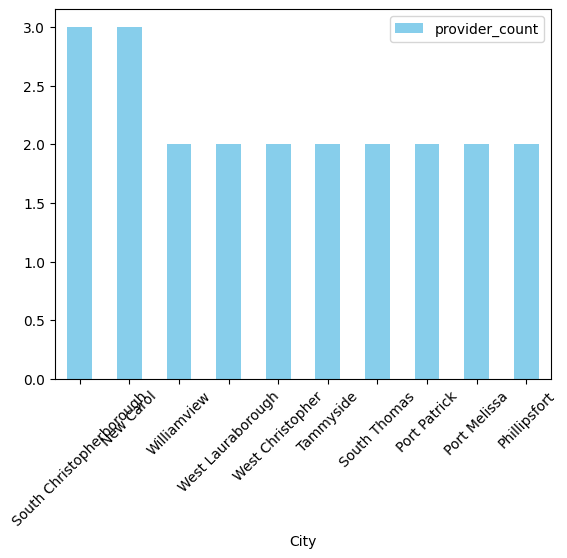

In [ ]:
import streamlit as st
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to DB
def run_query(query):
    conn = sqlite3.connect("food_wastage.db")
    df = pd.read_sql_query(query, conn)
    conn.close()
    return df

st.title("Local Food Wastage Management System Dashboard")

# Example: Query 1 - Providers per City
st.subheader("Top Cities by Number of Providers")
df1 = run_query("""
    SELECT City, COUNT(*) AS provider_count
    FROM providers
    GROUP BY City
    ORDER BY provider_count DESC
    LIMIT 10;
""")
st.dataframe(df1)

fig, ax = plt.subplots()
df1.plot(kind="bar", x="City", y="provider_count", ax=ax, color='skyblue')
plt.xticks(rotation=45)
st.pyplot(fig)


In [ ]:
city = st.selectbox("Select City", df1["City"].unique())
df_filtered = df1[df1["City"] == city]
st.write(df_filtered)


2025-08-15 19:32:36.303 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-15 19:32:36.304 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-15 19:32:36.309 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-15 19:32:36.310 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-15 19:32:36.311 Session state does not function when running a script without `streamlit run`
2025-08-15 19:32:36.312 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-15 19:32:36.313 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-15 19:32:36.315 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-15 19:32

In [ ]:
%%writefile app.py
import streamlit as st
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Function to run a query
def run_query(query):
    conn = sqlite3.connect("food_wastage.db")
    df = pd.read_sql_query(query, conn)
    conn.close()
    return df

st.title("Local Food Wastage Management Dashboard")

# Example query
query1 = """
SELECT City, COUNT(*) AS provider_count
FROM providers
GROUP BY City
ORDER BY provider_count DESC
LIMIT 10;
"""
df1 = run_query(query1)
st.subheader("Top 10 Cities by Number of Providers")
st.dataframe(df1)

fig, ax = plt.subplots()
df1.plot(kind="bar", x="City", y="provider_count", ax=ax, color='skyblue')
plt.xticks(rotation=45)
st.pyplot(fig)


Writing app.py
